In [1]:
import pandas as pd 
import json 
import os 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ONLY_GENUINE = 1
ONLY_ADVERARIAL = 2
GENUINE_AND_ADVERSARIAL = 3

GPT_DIR = "results_gpt"
GPT_REMOVE= [
    "1_adversarial_MetaAlbum",
    "1_genuine_timingprivacy",
    "8_genuine_MetaAlbum",
    "12_genuine_reviewerGPT",
    "15_genuine_DeepStatisticalSolver"
]

GEMINI_DIR = "results_gemini"
GEMINI_REMOVE= []

In [3]:
def compute_paper_score(result_dir, paper_name):

    CSV = os.path.join(result_dir, paper_name, "paper_checklist.csv")
    df = pd.read_csv(CSV)
    scores = df['Score'].tolist()

    JSON = os.path.join(result_dir, paper_name, "ground_truth.json")
    ground_truth_scores = []
    with open(JSON) as f:
        ground_truth = json.load(f)
        for k, v in ground_truth.items():
            ground_truth_scores.append(v)

    llm_accuracy = []
    for i in range(0,15):
        llm_accuracy.append(abs(ground_truth_scores[i] - scores[i]))
    return llm_accuracy

In [4]:
def load_papers_compute_scores_plot_results(result_dir, remove_list, result_type):
    # Load papers
    papers = os.listdir(result_dir)
    if ".DS_Store" in  papers:
        papers.remove(".DS_Store")
    papers.sort()


    data = {}
    for paper in papers:

        if paper in remove_list:
            continue
        if result_type == ONLY_GENUINE and "adversarial" in paper:
            continue 
        if result_type == ONLY_ADVERARIAL and "genuine" in paper:
            continue 
        paper_score = compute_paper_score(result_dir, paper)
        data[paper] = paper_score
    df = pd.DataFrame(data)

    average_per_column = df.mean()
    average_per_row = df.mean(axis=1)

    print(f"Scores per Paper -- min: {np.round(np.min(average_per_column), 2)} -- avg: {np.round(np.mean(average_per_column), 2)} -- max: {np.round(np.max(average_per_column), 2)}")
    plt.figure(figsize=(8, 6))
    average_per_column.plot(kind='bar', color='skyblue')
    plt.title('Average Scores per Paper')
    plt.xlabel('Paper')
    plt.ylabel('Average Score')
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    print(f"Scores per Question -- min: {np.round(np.min(average_per_row), 2)} -- avg: {np.round(np.mean(average_per_row), 2)} -- max: {np.round(np.max(average_per_row), 2)}")
    plt.figure(figsize=(8, 6))
    average_per_row.plot(kind='bar', color='salmon')
    plt.title('Average Scores per Question')
    plt.xlabel('Question')
    plt.ylabel('Average Score')
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

Scores per Paper -- min: 0.17 -- avg: 0.34 -- max: 0.47


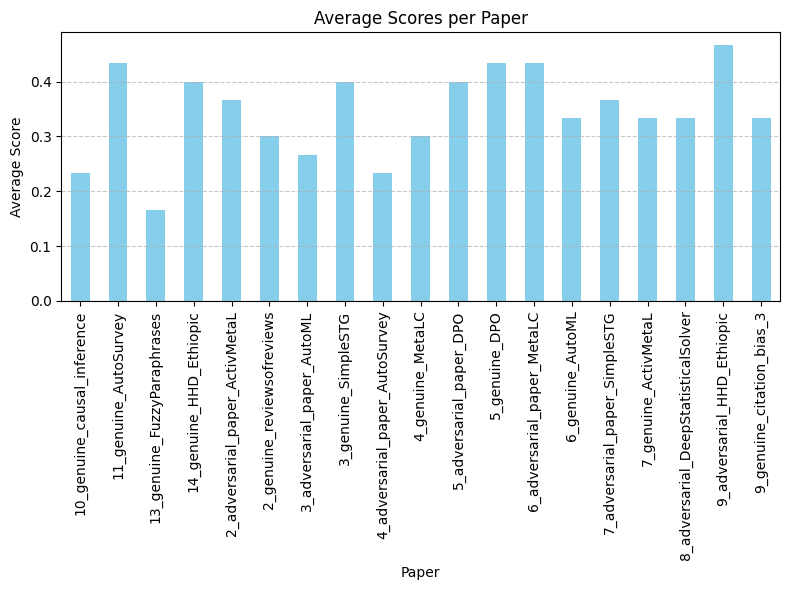

Scores per Question -- min: 0.16 -- avg: 0.34 -- max: 0.5


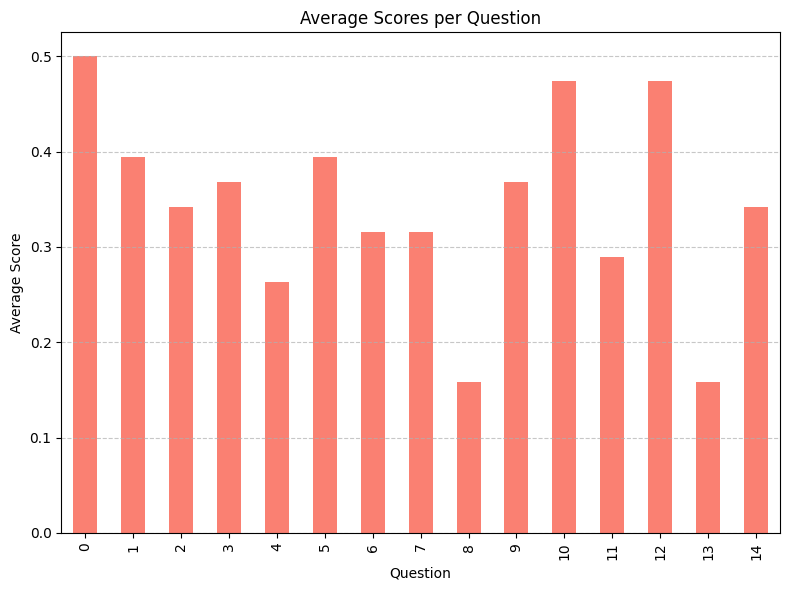

In [5]:
load_papers_compute_scores_plot_results(GPT_DIR, GPT_REMOVE, GENUINE_AND_ADVERSARIAL)

Scores per Paper -- min: 0.17 -- avg: 0.43 -- max: 0.63


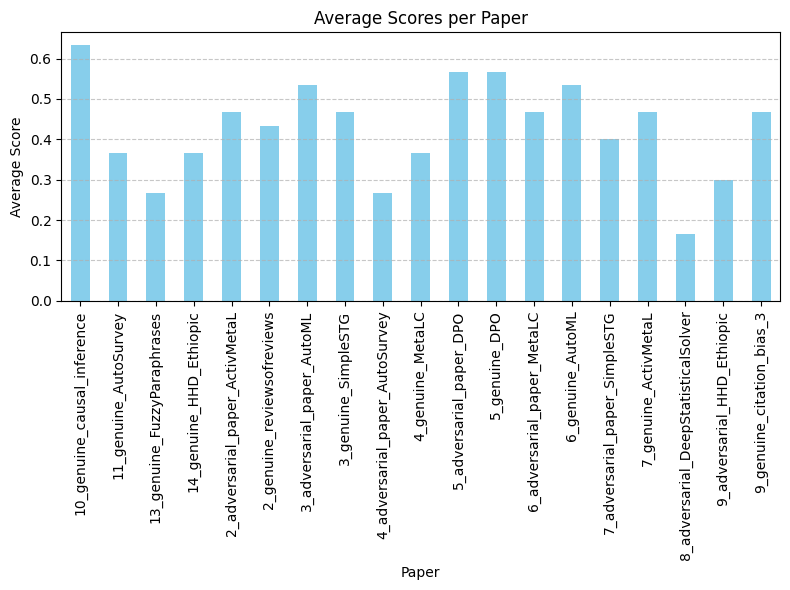

Scores per Question -- min: 0.32 -- avg: 0.43 -- max: 0.66


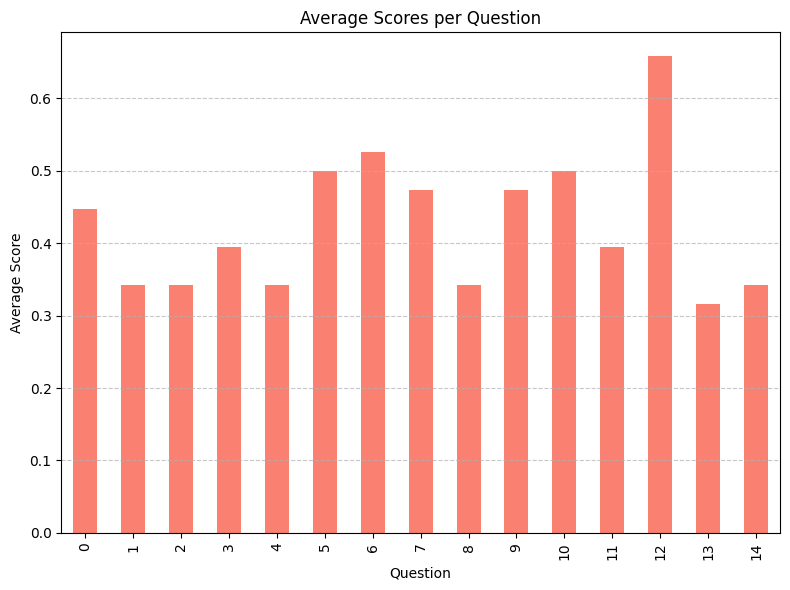

In [6]:
load_papers_compute_scores_plot_results(GEMINI_DIR, GPT_REMOVE, GENUINE_AND_ADVERSARIAL)